In [1]:
from actorcritic import ActorCriticAgent, EnvironmentWrapper, ContinuousActorCriticAgent
import gymnasium as gym
import datetime
import numpy as np

## Without freezing 

In [2]:
# hyperparameters
config = {
    'experiment': 'Acrobot2Cartpole',
    'device': 'cuda',
    'state_size': 6, 
    'action_size': 3,
    'hidden_sizes': [64, 64], 
    'lr_actor': 0.001,
    'lr_critic': 0.0005,
    'verbosity': 10,
    'env_name': 'CartPole-v1',
    'gamma': 0.99, 
    'reward_threshold': 475.0,
    'max_episodes': 2000,
    'max_steps': 500,
    'update_frequency': 500,
    'discrete': True

}


In [3]:
# Initialize the ActorCriticAgent
agent = ActorCriticAgent(config)

2024-03-12 13:29:32.311642: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-12 13:29:32.376281: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 13:29:32.376318: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 13:29:32.377834: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-12 13:29:32.387985: I tensorflow/core/platform/cpu_feature_guar

In [4]:
# load previous model weights
agent.load_models(env_name='Acrobot-v1')

In [5]:
# Initialize the environment
env = gym.make(config['env_name'])

env_wrapper = EnvironmentWrapper(env)

In [6]:
results = agent.train(env_wrapper, max_episodes=config['max_episodes'], max_steps=config['max_steps'], reward_threshold=config['reward_threshold'], update_frequency=config['update_frequency'])

Episode 0, Avg Reward: 8.0, PLoss: 0.819847583770752, VLoss: 888.7035522460938
Episode 10, Avg Reward: 9.818181818181818, PLoss: 0.6973293423652649, VLoss: 729.9449462890625
Episode 20, Avg Reward: 9.904761904761905, PLoss: 5.246307849884033, VLoss: 594.3250122070312
Episode 30, Avg Reward: 10.129032258064516, PLoss: 0.4212765693664551, VLoss: 443.0463562011719
Episode 40, Avg Reward: 10.170731707317072, PLoss: 2.4697561264038086, VLoss: 393.00616455078125
Episode 50, Avg Reward: 10.117647058823529, PLoss: 0.23804374039173126, VLoss: 272.2134094238281
Episode 60, Avg Reward: 10.01639344262295, PLoss: 0.20237696170806885, VLoss: 227.1310577392578
Episode 70, Avg Reward: 10.0, PLoss: 0.13236622512340546, VLoss: 166.9411163330078
Episode 80, Avg Reward: 9.938271604938272, PLoss: 0.12868519127368927, VLoss: 129.0911407470703
Episode 90, Avg Reward: 9.89010989010989, PLoss: 0.12228745222091675, VLoss: 98.60016632080078
Episode 100, Avg Reward: 9.91, PLoss: 3.1748909950256348, VLoss: 82.6074

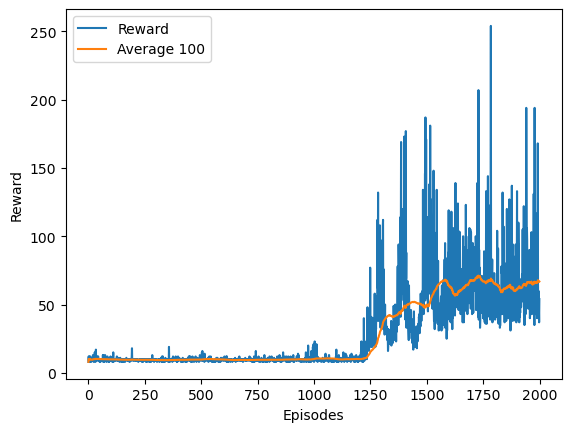

In [7]:
# plot results
import matplotlib.pyplot as plt

plt.plot(results['Episode'], results['Reward'], label='Reward')
plt.plot(results['Episode'], results['Average_100'], label='Average 100')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend()
plt.show()


In [8]:
# save results with model name and time
np.save(f'results/{config['experiment']}', results)

SyntaxError: f-string: unmatched '[' (516453649.py, line 2)

In [ ]:
results['Duration']

1251.0735347270966

## With freezing weights

In [ ]:
# hyperparameters
config = {
    'experiment': 'Acrobot2CartPole_freeze',
    'device': 'cuda',
    'state_size': 6, 
    'action_size': 3,
    'hidden_sizes': [64, 64], 
    'lr_actor': 0.001,
    'lr_critic': 0.0005,
    'verbosity': 10,
    'env_name': 'CartPole-v1',
    'gamma': 0.99, 
    'reward_threshold': 475.0,
    'max_episodes': 2000,
    'max_steps': 500,
    'update_frequency': 2000,
    'discrete': True

}



In [ ]:
# Initialize the ActorCriticAgent
agent = ActorCriticAgent(config)
# load previous model weights
agent.load_models(env_name='Acrobot-v1')

In [ ]:
agent.reinitialize_output_layers(config['action_size'])

In [ ]:

# Initialize the environment
env = gym.make(config['env_name'])

env_wrapper = EnvironmentWrapper(env)
results = agent.train(env_wrapper, max_episodes=config['max_episodes'], max_steps=config['max_steps'], reward_threshold=config['reward_threshold'], update_frequency=config['update_frequency'])
# plot results


In [ ]:
import matplotlib.pyplot as plt

plt.plot(results['Episode'], results['Reward'], label='Reward')
plt.plot(results['Episode'], results['Average_100'], label='Average 100')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.legend()
plt.show()



In [ ]:
# save results with model name and time
np.save(f'results/{config['experiment']}', results)

results['Duration']